# 0.0 Imports

In [1]:
import os
import pandas  as pd
import numpy   as np
import seaborn as sns
import datetime

from matplotlib import pyplot as plt
from IPython.display import Image

pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 24
sns.set()

# 1.0 - Business Questions 

The CEO of KC House held a meeting and the company's metrics were discussed. The CEO's requests are:

1 - Which property should be purchased and for what value?

2 - Once purchased, when is the best period to sell?

### 1.2 Understanding Business Questions
KC is a real estate sales company where its profit is in the arbitrage of the purchase, that is, in buying real estate for a value 'x' and selling it later for a higher value. However, the CEO had a question, given a portfolio of properties, from which they should be purchased and, once purchased, when should the sale be carried out in order to guarantee a profit. 



# 2.0 - Data Collect




In [2]:
#using pandas to read dataset
data = pd.read_csv('kc_house.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# 3.0 - Data Cleaning and Description


### 3.1 Data Dimensions


In [3]:
#printing dimensios
print(f'The number of rows is {data.shape[0]}')
print(f'The number of columns is {data.shape[1]}')


The number of rows is 21613
The number of columns is 21


### 3.2 Data Types

In [3]:
data.dtypes

#'date' as datetime
data['date'] = pd.to_datetime(data['date'])

#'yr_built' as datetime
data['yr_built'] = pd.to_datetime(data['yr_built'].astype(str))

#'yr_renovated' as datetime
data['yr_renovated'] = pd.to_datetime(data['yr_renovated'].astype(str).replace('0','1800'))



### 3.3 Check NA

In [6]:
#sum of NA's in columns
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 3.4 Descriptive Statistical


#### 3.4.1 Numerical Variables

In [3]:
#taking only numeric
df = data.select_dtypes(include=['int64', 'float64'])

#applying functions in columns
df_min = pd.DataFrame(df.apply(min)).T #minimum
df_max = pd.DataFrame(df.apply(max)).T #maximum
df_range = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T #range
df_mean = pd.DataFrame(df.apply(np.mean)).T #mean
df_median = pd.DataFrame(df.apply(np.median)).T #median
df_std = pd.DataFrame(df.apply(np.std)).T #standard deviation
df_skew = pd.DataFrame(df.apply(lambda x:x.skew())).T #skewness
df_kurtosis = pd.DataFrame(df.apply(lambda x:x.kurtosis())).T #kurtosis

#creating a statistics dataframe called 'summary'
summary = pd.concat([df_min,df_max,df_range,df_mean,df_median,df_std,df_skew,df_kurtosis]).T 
#rename columns
summary.columns = ['Min','Max','Range','Mean','Median','Standard Deviation','Skewness','Kurtosis'] 

summary

,Min,Max,Range,Mean,Median,Standard Deviation,Skewness,Kurtosis
id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


#### 3.4.2 DateTime Variables


In [6]:
#taking only date 
summary_date = data.select_dtypes(exclude=['int64','float64'])
#creating a statistics dataframe
pd.DataFrame.describe(summary_date,datetime_is_numeric=True)

,date,yr_built,yr_renovated
count,21613,21613,21613
mean,2014-10-29 04:38:01.959931648,1971-01-03 00:06:59.747374252,1808-04-13 17:09:46.813491200
min,2014-05-02 00:00:00,1900-01-01 00:00:00,1800-01-01 00:00:00
25%,2014-07-22 00:00:00,1951-01-01 00:00:00,1800-01-01 00:00:00
50%,2014-10-16 00:00:00,1975-01-01 00:00:00,1800-01-01 00:00:00
75%,2015-02-17 00:00:00,1997-01-01 00:00:00,1800-01-01 00:00:00
max,2015-05-27 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00


# 4.0 Hypothesis and Feature Engineering

### 4.1 Hypothesis - MindMap

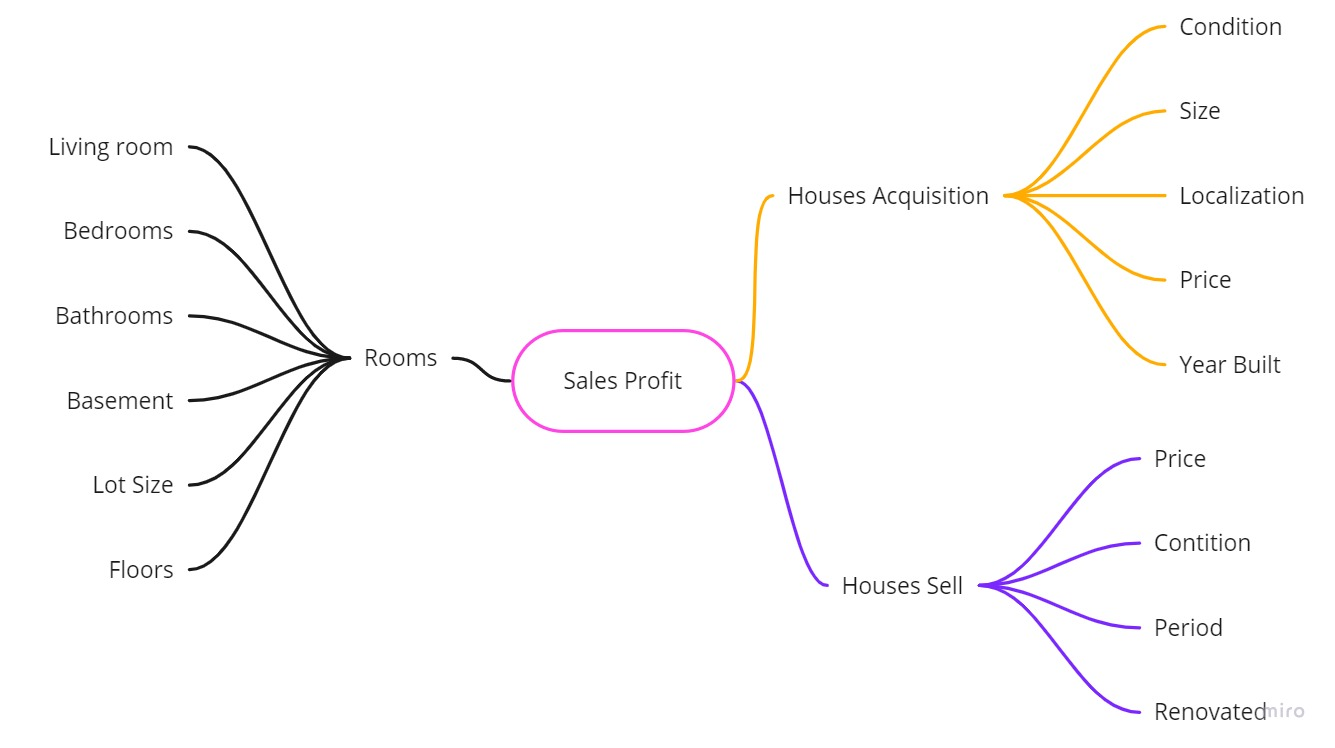

In [5]:
df4 = data.copy()
Image( 'mindmap.jpg' )

### 4.2 Hypothesis - Hypothesis Criation

1 - Houses in better condition have prices above the median

2 - Homes built before 1960 are 30% cheaper

3 - Homes located overlooking the water are 50% more expensive on average

4 - In the first half of the year the price of the house is 20% more expensive, on average

5 - Houses that have been renovated are priced higher than the median

6 - Houses that have 3 bedrooms and 2 bathrooms are priced above the median

7 - House prices have a 10% MoM (Month over Month) increase

8 - Homes with a basement are 20% more expensive, on average

9 - Houses with a number of floors above 2 are 20% more expensive, on average

10 - Homes are 20% more expensive in summer, on average





### 4.2 Feature Engineering

In [6]:
#naming conditions
df4['condition'] = df4['condition'].apply(lambda x: 'bad' if x <= 2 else 'regular' 
                                                           if 3 <= x <= 4 else 'good' 
                                                           if x == 5 else 'NA')

#creating year built levels (built begore 1960; built after 1960)
df4['yr_built2'] = df4['yr_built'].dt.year.apply(lambda x: '< 1960' if x < 1960 else '> 1960')

#creating months
df4['month'] = df4['date'].dt.month

#creating semesters
df4['semester'] = df4['month'].apply(lambda x: '1st semester' if x < 7 else '2nd semester')

#creating if houses were renovated
df4['renovated'] = df4.apply(lambda x: 'renovated' if x['yr_renovated'] > x['yr_built'] else 'no renovated', axis=1) 

#houses with basement = 1, else = 0 
df4['basement'] = df4['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

#creating seasons
df4['season'] = df4.apply( lambda x: 'summer' if ( x['month'] >=6 and x['month'] <=8 ) else 'winter' if ( x['month'] ==12 or x['month'] ==2 or x['month'] ==1 ) else 'fall' if ( x['month'] >=9 and x['month'] <=11 ) else 'spring' if ( x['month'] >=3 and x['month'] <=5 ) else '' , axis=1 )



# 5.0 Exploratory Data Analysis


### 5.1 Hypothesis Analysis


#### 1 - Houses in better conditions have prices above the median
**TRUE - Houses classified as in good condition have a median price above the median of the portfolio**


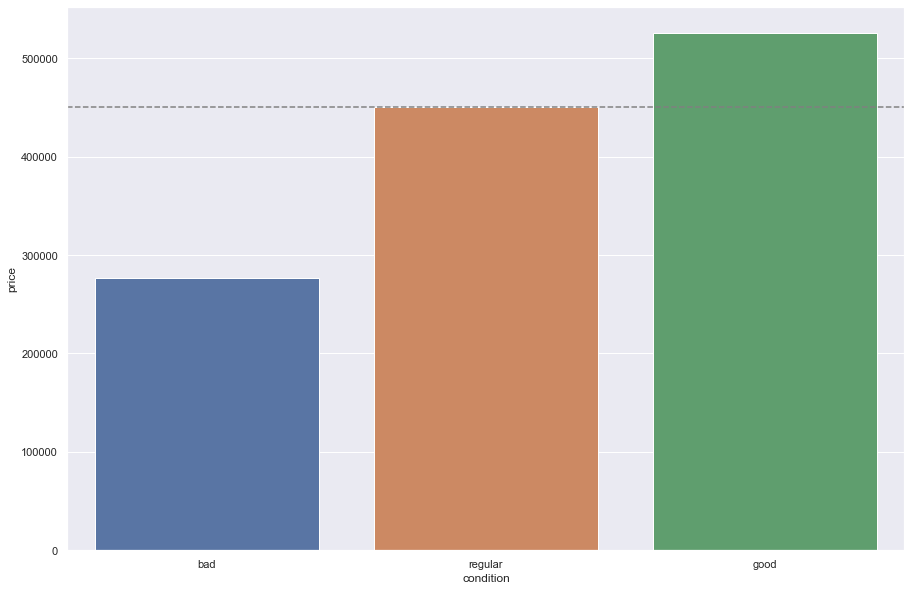

In [19]:
#grouping the median price by condition
h_1 = df4[['condition','price']].groupby('condition').median().sort_values('price').reset_index()
sns.barplot(x='condition',y='price',data=h_1);
plt.axhline( np.median(df4['price']), linestyle='--', color ='gray');



#### 2 - Houses built before 1960 are 30% cheaper
**FALSE - Homes built before 1960 are only 4.4% cheaper**

C:\Users\mathe\AppData\Local\Temp\ipykernel_35784\183054527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['yr_built'] = aux['yr_built'].dt.year


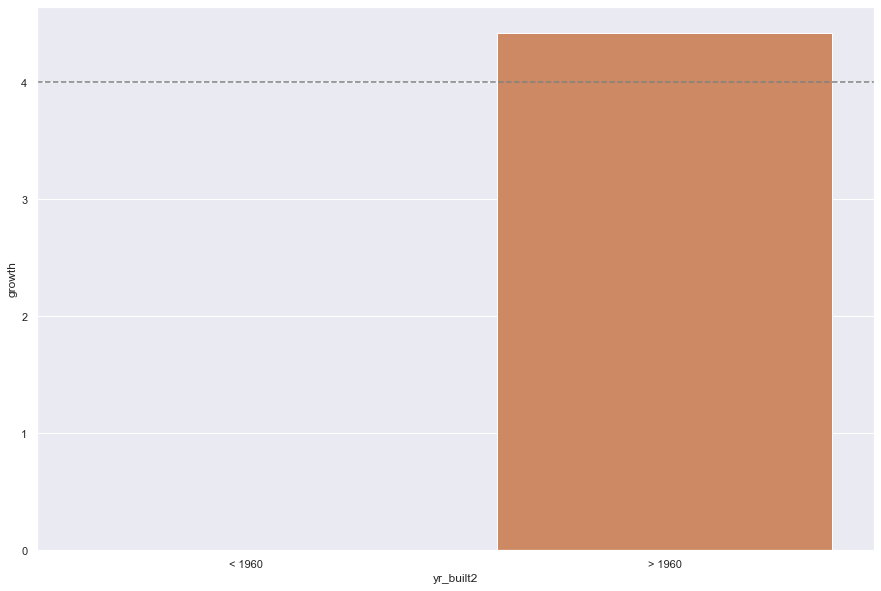

In [8]:
#get yr_built year
aux = df4[['yr_built','price','yr_built2']]
aux['yr_built'] = aux['yr_built'].dt.year

#grouping the mean price by year built before and after 1960
h_2 = aux[['yr_built2','price']].groupby('yr_built2').mean().reset_index()
h_2['growth'] = 100*h_2['price'].pct_change()

h2 = sns.barplot(x='yr_built2',y='growth',data=h_2);
plt.axhline( 4, linestyle='--', color ='gray');


#### 3 - Houses located overlooking the water are 50% more expensive, on average
**FALSE - Homes with a water view are approximately 200% more expensive, on average, compared to those without a water view**

posx and posy should be finite values
posx and posy should be finite values


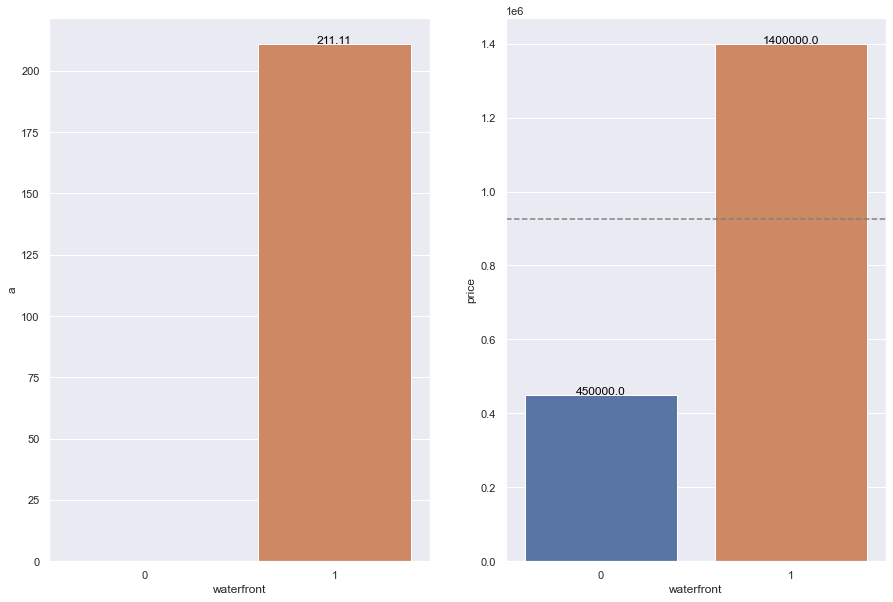

In [11]:
#grouping median price by waterfront 
h_3 =  df4[['waterfront','price']].groupby('waterfront').median().reset_index()
# sns.barplot(x='waterfront',y='price',data=h_3)

#get the percentage change between the current and a prior element.
h_3['a'] = 100 * h_3['price'].pct_change()

plt.subplot( 1, 2, 1 )
a = sns.barplot(x='waterfront',y='a',data=h_3)
for index, row in h_3.iterrows():
    a.text(row.name,row.a, round(row.a,2), color='black', ha="center")

plt.subplot( 1, 2, 2 )
b=sns.barplot(x='waterfront',y='price',data=h_3)
for index, row in h_3.iterrows():
    b.text(row.name,row.price, round(row.price,2), color='black', ha="center")
plt.axhline( np.mean(h_3['price']), linestyle='--', color ='gray');

#### 4 - In the first half of the year the price of the house is 20% more expensive, on average
**FALSE - In the first semester, houses are only 2.3% more expensive, on average, when compared to the second semester**

posx and posy should be finite values
posx and posy should be finite values


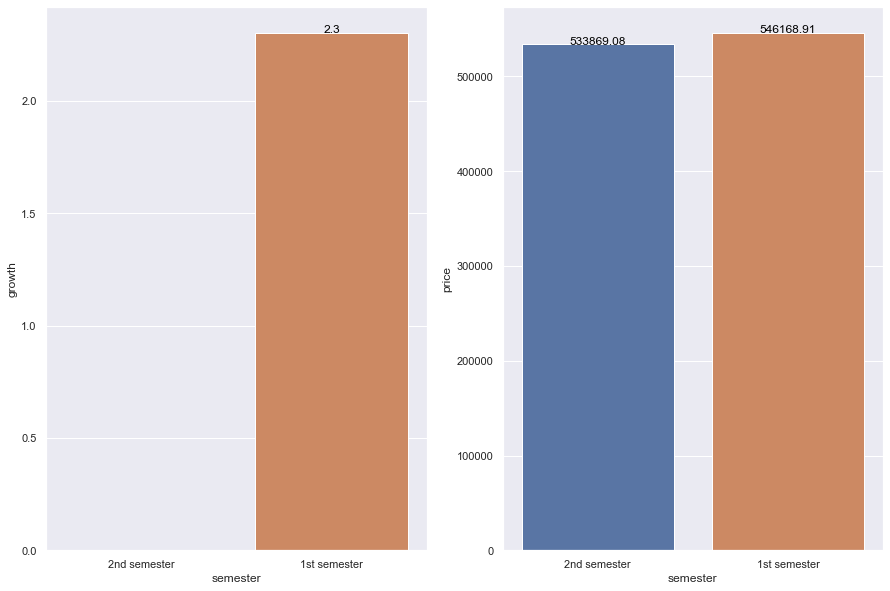

In [12]:
aux = df4[['date','price','semester']]

plt.subplot( 1, 2, 1 )
#grouping mean price by semesters
h_4 = aux[['semester','price']].groupby('semester').mean().sort_values('price').reset_index()
h_4['growth'] = 100 * h_4['price'].pct_change()
c = sns.barplot(data=h_4,x='semester',y='growth')

for index, row in h_4.iterrows():
    c.text(row.name,row.growth, round(row.growth,2),color='black', ha="center" )
    
plt.subplot( 1, 2, 2 )
d = sns.barplot(data=h_4,x='semester',y='price')
for index, row in h_4.iterrows():
    d.text(row.name,row.price, round(row.price,2),color='black', ha="center" )

#### 5 - Houses that underwent renovation have prices higher than the median
**TRUE - Houses that have undergone renovation have prices higher than the median of the portfolio**

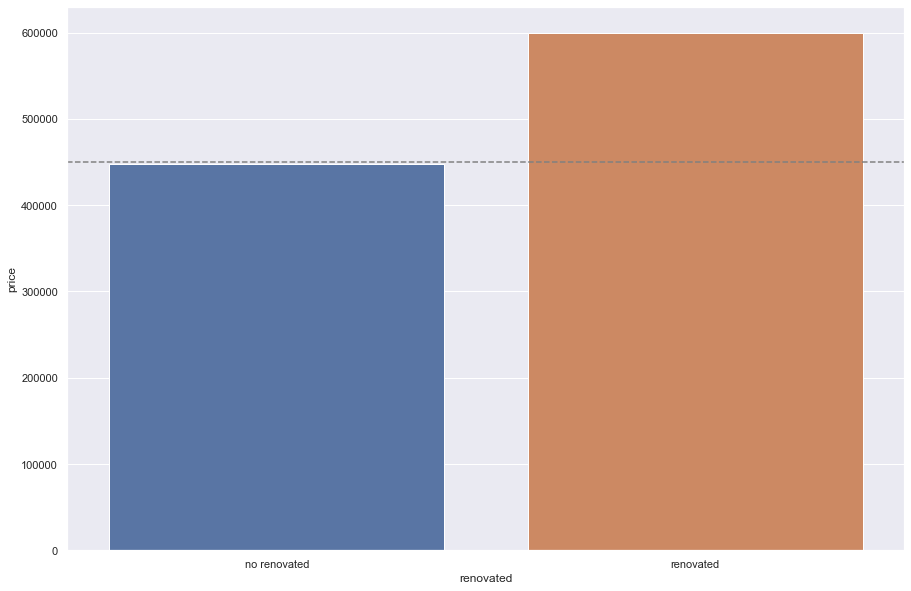

In [13]:
aux = df4[['price','yr_renovated','yr_built','renovated']]

#grouping median price by houses renovated condition
h_5 = aux[['renovated','price']].groupby('renovated').median().reset_index()
sns.barplot(data=h_5, x='renovated',y='price')
plt.axhline( np.median(df4['price']), linestyle='--', color ='gray');

#### 6 - Houses with 3 bedrooms and 2 bathrooms are priced above the median
**TRUE - Homes with more than 3 bedrooms and more than 2 bathrooms are priced around 19% higher than the portfolio median**

In [18]:
#price percentage of houses with more rooms
(df4.loc[(df4['bedrooms'] >=3) & (df4['bathrooms'] >=2 ),'price'].median() - np.median(df4['price'])) / np.median(df4['price'])*100


19.27777777777778

#### 7 - House prices have a 10% MoM (Month over Month) increase
**FALSE - MoM growth is not linear and does not reach 10% higher in any month**

C:\Users\mathe\AppData\Local\Temp\ipykernel_10552\200216793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['month'] = aux['date'].dt.month
posx and posy should be finite values
posx and posy should be finite values


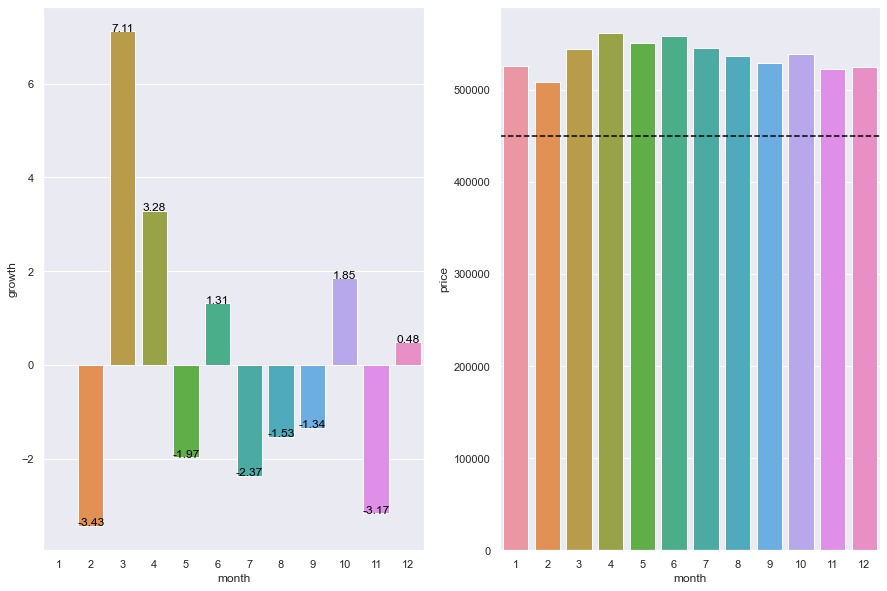

In [15]:

aux = df4[['price','date','month']]

#grouping mean price by months
h_7 = aux[['month','price']].groupby('month').mean().sort_values('month').reset_index()
h_7['growth'] = 100*h_7['price'].pct_change()
plt.subplot(1,2,1)
a=sns.barplot(data=h_7, x='month',y='growth')
for index, row in h_7.iterrows():
    a.text(row.name,row.growth,round(row.growth,2),color='black',ha='center')

plt.subplot(1,2,2)
b=sns.barplot(data=h_7, x='month',y='price')
plt.axhline( np.median(df4['price']), linestyle='--', color ='black');

#### 8 - Houses that have a basement are priced higher than the median
**TRUE - Homes with a basement are more expensive than the portfolio median and 25% more expensive compared to those without a basement**

posx and posy should be finite values
posx and posy should be finite values


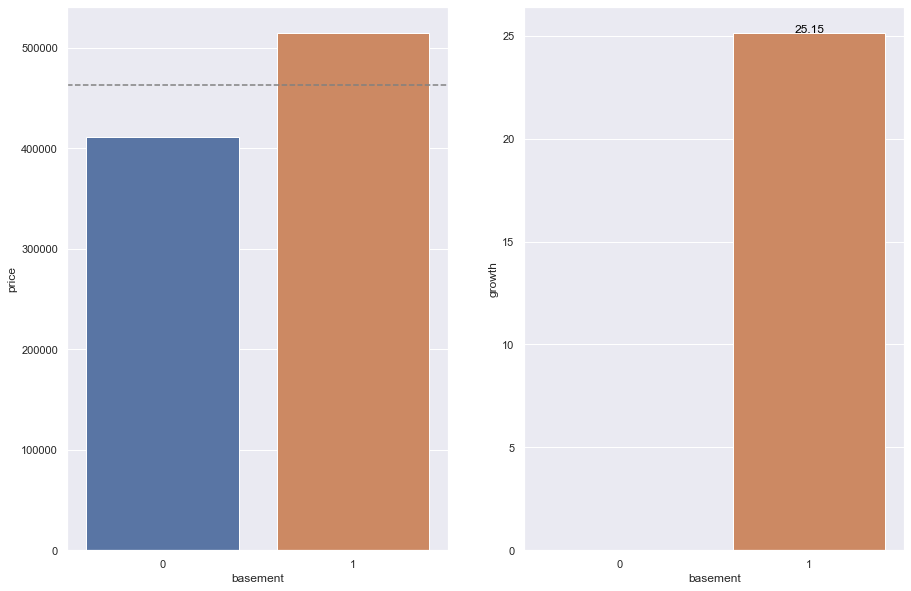

In [16]:
aux = df4[['price','sqft_basement','basement']]

#grouping median price by basement 
h_8 = aux[['price','basement']].groupby('basement').median().reset_index()


plt.subplot(1,2,1)
a=sns.barplot(data=h_8, x='basement',y='price')
plt.axhline( np.median(h_8['price']), linestyle='--', color ='gray');

plt.subplot(1,2,2)
h_8['growth'] = 100*h_8['price'].pct_change()
b=sns.barplot(data=h_8, x='basement',y='growth')
for index, row in h_8.iterrows():
    b.text(row.name,row.growth,round(row.growth,2),color='black',ha='center')



#### 9 - Houses with floors above 2 are 20% more expensive, on average
**FALSE - Houses with 2 floors and above tend to be more expensive, but are not 20% more expensive than average**

posx and posy should be finite values
posx and posy should be finite values


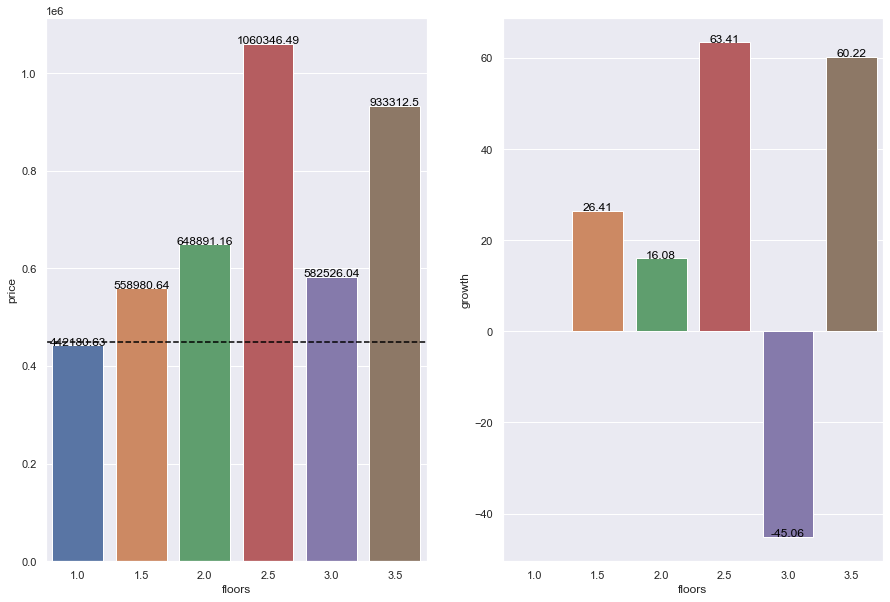

In [17]:
#grouping mean price by floors
aux = df4[['floors','price']].groupby('floors').mean().reset_index()
aux['growth'] = 100 * aux['price'].pct_change()

plt.subplot(1,2,1)
a = sns.barplot(x='floors', y='price', data=aux);
plt.axhline( np.median(df4['price']), linestyle='--', color ='black');

for index, row in aux.iterrows():
    a.text(row.name,row.price, round(row.price,2), color='black', ha="center")
    
plt.subplot(1,2,2)
b = sns.barplot(x='floors', y='growth', data=aux);
for index, row in aux.iterrows():
    b.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

#### 10 - Houses are 20% more expensive in summer on average
**FALSE - Houses are more expensive in spring and summer and cheaper in winter, but in summer they don't have this 20% impact**

posx and posy should be finite values
posx and posy should be finite values


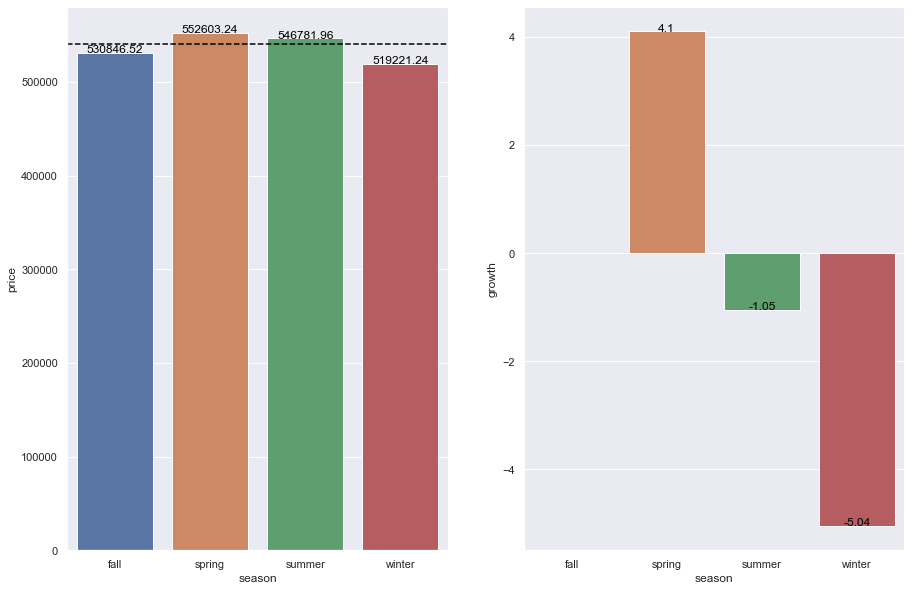

In [19]:
aux = df4[['date','price','month','season']]

#grouping mean price by season
h_10 = aux[['season','price']].groupby('season').mean().reset_index()
h_10['growth'] = 100 * h_10['price'].pct_change()


plt.subplot(1,2,1)
a = sns.barplot(x='season', y='price', data=h_10); 
for index, row in h_10.iterrows():
    a.text(row.name,row.price, round(row.price,2), color='black', ha="center")
plt.axhline(np.mean(df4['price']), linestyle='--', color ='black')

plt.subplot(1,2,2)
b = sns.barplot(x='season', y='growth', data=h_10); 
for index, row in h_10.iterrows():
    b.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")



### 5.2 Correlation Analysis


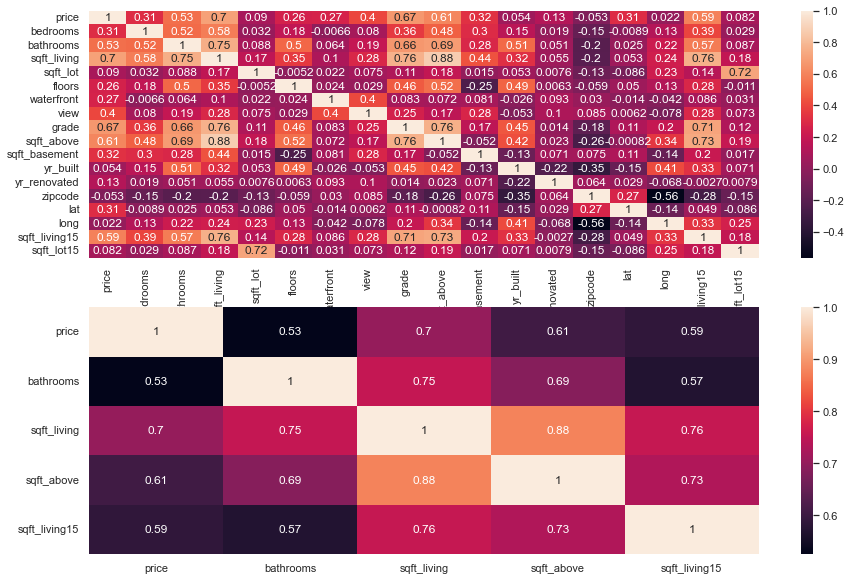

In [10]:
#numeric variables
aux = df4.select_dtypes(include=['int64','float64'])
aux = aux.drop('id',axis=1)

#Pearson Correlation
plt.subplot(2,1,1)
sns.heatmap( aux.corr(method='pearson'), annot=True );
aux1 = aux[['price','bathrooms','sqft_living','sqft_above','sqft_living15']]

#Pearson Correlation
plt.subplot(2,1,2)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

# 6.0 Solutions

As a way of answering the CEO's questions, the following purchase conditions were suggested:
- Houses built before 1960 in good condition, and below average price;
- Houses overlooking the water with price below average;
- Houses that have not undergone renovation and are in good condition, and below average price;
- Houses that have a basement and price below the median.

And the following conditions of sale:
- If the sale period is bad, sale value = 'House value + 10%'
- If the sale period is good, sale value = 'House value + 30%'
     > Good period for purchase = (Spring or Summer) and 1st semester of the year

     > Bad period otherwise
 






In [7]:
df6 = df4.copy()

In [8]:
#grouping median price by zipcode
aux = df6[['zipcode','price']].groupby('zipcode').median().reset_index() 

#rename columns
aux = aux.rename(columns={"zipcode": "zipcode","price": "zip_median_price"})

#merge datasets
aux1 = pd.merge(aux, df6, on='zipcode', how='inner') 

#creating columns that sugests 'buy' or 'not buy' based on assumptions of solutions
aux1['status'] = aux1.apply(lambda x: 'buy' if (((x['yr_built2'] == '< 1960') & (x['condition']=='good')) | #1 condition or 
                                               (x['waterfront'] == 1 )  | # 2 condition or 
                                               ((x['renovated'] == 'no renovated' ) & ((x['condition'] == 'good') )) | # 3 condition or
                                               ((x['basement'] == 1 ))) &  # 4 condition  
                                                (x['price'] < x['zip_median_price']) # and median price lowest
                                                else 'not_buy', axis=1 )




In [9]:
#get only 'buy' sugests
aux2 = aux1[aux1['status'] == 'buy']

#creating periods to sell 'good' and 'bad' time to sell, based on assumptions of solutions
aux2['period'] = aux2.apply(lambda x: 'good_time' if (x['season'] == 'spring') | (x['season'] == 'summer') | (x['semester'] == '1st semester') else 'bad_time', axis=1)
aux2['price_to_sell'] = aux2.apply(lambda x: x['price']+x['price']*0.1  if x['period'] == 'bad_time' else x['price']+x['price']*0.3, axis=1)

#get profit margin
profit = np.sum(aux2['price_to_sell']) - np.sum(aux2['price']) 
print('Properties to buy: {} \nPrice to Buy: {:,.2f} \nPrice to Sell: {:,.2f} \nProfit: {:,.2f} \nProfit Percentage: {:,.2f}'.format(len(aux2['status'] == 'buy'), 
                                          aux2['price'].sum(), 
                                          aux2['price_to_sell'].sum(), 
                                          profit,
                                          (profit/aux2['price'].sum())*100) )

Properties to buy: 4025 
Price to Buy: 1,701,883,512.00 
Price to Sell: 2,103,589,673.00 
Profit: 401,706,161.00 
Profit Percentage: 23.60


C:\Users\mathe\AppData\Local\Temp\ipykernel_41868\1962530941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2['period'] = aux2.apply(lambda x: 'good_time' if (x['season'] == 'spring') | (x['season'] == 'summer') | (x['semester'] == '1st semester') else 'bad_time', axis=1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_41868\1962530941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2['price_to_sell'] = aux2.apply(lambda x: x['price']+x['price']*0.1  if x['period'] == 'bad_time' else x['price']+x

In [18]:
aux2.to_csv('C:\\Users\\mathe\\OneDrive\\Documentos\\KC_HOUSE\\dados2',index=False)